# **World Population Analysis**


---


### Mounting Google Drive
Goto to link and paste the authorization code below.

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Downloading World Population Prospects 2019 data
Download annual and single age (male and female seperate) datasets from [World Population Prospects 2019](https://population.un.org/wpp/Download/Standard/Interpolated/)

### Upload datasets to drive
Upload `WPP2019_INT_F03_2_POPULATION_BY_AGE_ANNUAL_MALE.xlsx` and `WPP2019_INT_F03_3_POPULATION_BY_AGE_ANNUAL_FEMALE.xlsx` dataset files to `/My Drive/population_data/`

### Loading data
Loading male and female data of population by ages

In [37]:
import pandas as pd

world_population_male =  pd.read_excel('/content/drive/My Drive/population_data/WPP2019_INT_F03_2_POPULATION_BY_AGE_ANNUAL_MALE.xlsx', sheet_name='ESTIMATES', index_col='Index', header=16)
world_population_female =  pd.read_excel('/content/drive/My Drive/population_data/WPP2019_INT_F03_3_POPULATION_BY_AGE_ANNUAL_FEMALE.xlsx', sheet_name='ESTIMATES', index_col='Index', header=16)
world_population_male

,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Estimates,WORLD,NaN,900,World,0,1950,39854,36612.4,33956.5,31828.1,30168.9,28920.6,28024.9,27423.6,27058.4,26870.9,26876.5,27090.2,27086.4,26659.9,25972.8,25377.7,24786.5,24290.6,23965.1,23735.3,23466.1,23202.3,22811.9,22221.6,21504.6,20819.9,20149.8,19493.8,18871.8,18290.4,17711.2,17113,16690.4,...,7237.94,6917.04,6547.46,6148.13,5759.51,5374.37,4999.63,4643.05,4300.69,3961.6,3628.94,3305.49,2991.89,2689.06,2399.06,2123.65,1858.58,1602.67,1359.71,1132.61,918.3,736.861,597.751,491.198,396.584,316.334,249.136,191.511,143.081,103.235,76.987,62.345,45.999,27.944,17.811,15.139,12.094,8.675,4.887,9.393
2,Estimates,WORLD,NaN,900,World,0,1951,42186.7,38929.8,35995.8,33562.1,31582.7,30011.3,28792,27868.6,27245.1,26895.1,26742.8,26753.9,26954,26938.5,26508.2,25821.9,25223.2,24625.7,24125.5,23798.9,23570.5,23302.3,23039.4,22651,22063.6,21350.4,20669.4,20003.1,19350.3,18731,18151.4,17573.8,16976.9,...,7241.99,6940.34,6612.88,6240,5839.92,5451.26,5067.16,4695,4342.64,4006.04,3674.05,3349.72,3036.3,2734.59,2445.17,2169.33,1908.44,1659.85,1422.91,1200.31,993.39,799.366,636.259,512.296,418.502,335.895,267.367,210.787,161.515,119.261,85.412,63.94,51.706,38.081,23.038,14.423,11.446,8.158,4.562,8.429
3,Estimates,WORLD,NaN,900,World,0,1952,44040.4,40769.4,37983.2,35355,33142.5,31311.6,29828.3,28638.7,27688.7,27044.4,26711.9,26597.1,26616.2,26805.6,26780,26345.2,25657.7,25053.6,24447.6,23942.2,23616,23391.4,23126.5,22866.9,22481.7,21897.2,21186.6,20508.3,19844.8,19194.2,18576,17996.7,17419.2,...,7269.23,6948.54,6638.94,6305.56,5929.81,5529.27,5140.89,4758.1,4388.87,4041.2,3710.91,3386.5,3070.99,2767.93,2478.23,2202.28,1940.61,1694.25,1462.12,1244.13,1041.9,855.147,681.376,536.518,427.655,346.492,275.811,218.896,172.847,131.854,95.726,67.769,51.038,41.186,30.237,18.188,10.857,7.691,4.268,7.648
4,Estimates,WORLD,NaN,900,World,0,1953,45332.4,42142,39288.9,37057.7,34734.9,32742.9,31059.9,29664,28503.3,27525.9,26860.4,26545,26467.7,26494.8,26673.3,26637.4,26197.6,25508.3,24898.1,24283,23771.7,23445.5,23224.7,22962.9,22706.2,22324.1,21742.1,21033.6,20357.8,19696.8,19047.9,18430.6,17851.3,...,7320.23,6987.5,6658.23,6340.62,6001.23,5622.42,5221.18,4832.85,4451.14,4084.66,3741.53,3417.46,3100.52,2793.7,2500.91,2223.12,1960.51,1712.87,1480.9,1265.1,1065.96,884.014,717.324,563.698,437.037,343.189,274.648,215.849,170.527,134.971,102.248,72.21,50.16,38.16,30.675,22.407,13.343,7.293,4.017,7.009
5,Estimates,WORLD,NaN,900,World,0,1954,46068.4,43128,40447.1,38017.6,36174.9,34155.2,32382,30845.4,29535.7,28403,27397.3,26709.7,26410.5,26369.7,26403.9,26570.9,26524,26078.8,25387.2,24770.7,24146.1,23628.7,23301.6,23083.5,22823.5,22568.9,22188.9,21609,20902.3,20228.5,19569.6,18922.4,18305.8,...,7422.13,7055.28,6712.47,6374.17,6048.08,5702.22,5319.9,4917.51,4528.77,4147.7,3783.55,3444.6,3126.36,2816.54,2518.12,2235.3,1969.17,1719.69,1485.91,1268.21,1068.62,888.21,726.423,579.685,446.141,337.607,258.738,202.792,155.885,122.14,97.097,72.617,48.685,32.539,25.26,20.165,14.572,8.503,3.812,6.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18101,Estimates,United States of America,29,840,Country/Area,918,2016,1924.99,1943.81,2004.95,2053.84,2091.67,2119.63,2139.47,2152.93,2158.46,2156.14,2148.83,2139.35,2127.25,2122.03,2128.79,2144.26,2157.36,2167.01,2189.12,2229.43,2279.52,2326.53,2374.57,

## Preprocessing

### Renaming ages columns
Renaming ages columns 0, 1, 2 ... 100 to gender1, gender2, gender3, ... gender100

In [38]:
world_population_male = world_population_male.rename({str(i):'male'+str(i) for i in range(101)}, axis='columns')
world_population_female = world_population_female.rename({str(i):'female'+str(i) for i in range(101)}, axis='columns')
world_population_female

,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),female0,female1,female2,female3,female4,female5,female6,female7,female8,female9,female10,female11,female12,female13,female14,female15,female16,female17,female18,female19,female20,female21,female22,female23,female24,female25,female26,female27,female28,female29,female30,female31,female32,...,female61,female62,female63,female64,female65,female66,female67,female68,female69,female70,female71,female72,female73,female74,female75,female76,female77,female78,female79,female80,female81,female82,female83,female84,female85,female86,female87,female88,female89,female90,female91,female92,female93,female94,female95,female96,female97,female98,female99,female100
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Estimates,WORLD,NaN,900,World,0,1950,38581.5,35347.9,32693.2,30560.6,28893.5,27635.2,26729,26118.2,25746.3,25556.4,25561.4,25774,25790.5,25415.7,24801,24283.8,23785.2,23359.2,23062.6,22841.8,22587.7,22323.5,22008.6,21612.3,21157.3,20720.7,20315.8,19819.9,19189,18492.2,17812.2,17095.6,16616.8,...,8146.8,7864.62,7522.27,7140.28,6765.22,6390.21,6012.48,5636.07,5261.71,4886.61,4512.19,4147.83,3798.28,3461.53,3133.75,2819.13,2508.86,2199.17,1897.23,1612.17,1339.85,1104.95,919.98,773.371,639.537,521.726,420.99,334.547,261.482,197.291,152.093,125.409,95.081,61.11,41.59,35.639,28.763,20.976,12.27,24.506
2,Estimates,WORLD,NaN,900,World,0,1951,40594.9,37655.3,34738.6,32311.7,30330.9,28752.3,27521.4,26583.4,25948.5,25594.5,25445.1,25459.5,25661.5,25669.1,25292.5,24679.8,24160.1,23656.5,23225.6,22925,22700.9,22443.2,22175.1,21858.1,21462.3,21009.4,20574.8,20171.9,19678.1,19049.2,18354.3,17676.2,16961.6,...,8154.21,7895.28,7602.15,7252.07,6864.77,6484.86,6106.02,5725.37,5346.78,4971.25,4596.56,4223.89,3863.6,3520.88,3193.34,2875.77,2572.11,2275.64,1983.34,1701.13,1436.04,1184.15,968.557,800.665,669.401,549.862,447.203,361.084,285.701,220.249,164.833,127.567,104.986,79.383,50.776,34.482,27.727,20.136,11.726,22.707
3,Estimates,WORLD,NaN,900,World,0,1952,42176.1,39134.4,36704.6,34105,31906.6,30078.6,28589.8,27387.5,26419.2,25761.9,25427.7,25320.8,25346.7,25540.4,25540.2,25161.2,24549.1,24025.5,23515,23078.7,22775.4,22550.6,22291.5,22021.8,21704.1,21308.7,20857,20423.7,20022.2,19529.7,18901.5,18206.9,17529.1,...,8190.73,7912.61,7641.38,7337.75,6980.07,6587.39,6202.65,5819.96,5436.52,5056.1,4679.96,4306.11,3935.67,3579.81,3244.11,2925.83,2618.54,2325.89,2043.25,1768.34,1505.88,1260.7,1029.19,832.874,682.049,566.141,460.875,373.342,301.819,237.381,179.457,132.703,103.3,84.765,63.847,40.565,26.625,19.251,11.177,21.253
4,Estimates,WORLD,NaN,900,World,0,1953,43274.2,40371.7,37744.6,35772.6,33489.4,31519,29843,28443.4,27269.3,26270.1,25589.9,25275.4,25210.9,25248.1,25433.6,25425.5,25043.6,24431.5,23903.5,23385.6,22943.3,22637.1,22411.4,22150.7,21879.2,21560.5,21165.2,20714.3,20281.8,19881.4,19389.7,18761.9,18067.3,...,8252.78,7964.27,7673.72,7390.22,7076.03,6710.59,6312.29,5922.47,5535.72,5149.29,4766.94,4390.09,4017.03,3648.76,3297.23,2968.45,2659.33,2362.21,2080.48,1811.58,1553.98,1311.14,1085.8,874.582,697.442,563.649,463.048,372.015,299.6,242.647,189.144,138.728,100.617,79.046,64.558,48.336,30.355,18.438,10.671,20.021
5,Estimates,WORLD,NaN,900,World,0,1954,43906.4,41265.6,38822.5,36575.2,34879.7,32910.5,31165.8,29640.3,28328.3,27181.2,26150.2,25446.2,25150.5,25127.6,25175.6,25352.2,25335.6,24950.6,24338.2,23805.5,23280,22831.4,22521.5,22293.7,22030.4,21756.1,21435.5,21039.7,20589.3,20157.4,19757.6,19266.5,18639,...,8371.76,8045.6,7743.71,7440.43,7144.34,6819.25,6445.7,6041.45,5646.24,5255.1,4865.36,4480.72,4102.82,3730.21,3363.76,3016.28,2694.18,2394.02,2106.92,1835.95,1580.63,1340.18,1116.86,911.228,720.211,562.182,445.34,360.002,283.17,225.835,183.435,140.875,97.953,68.506,54.786,44.363,32.817,20.14,10.243,18.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### Merging data
Merging male and female data on the basis of first 7 columns which are same in both datasets

In [39]:
same_columns = list(world_population_male.columns[:7])
world_population_by_age_gender = pd.merge(world_population_male, world_population_female, how='left', left_on=same_columns, right_on=same_columns)
world_population_by_age_gender

,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),male0,male1,male2,male3,male4,male5,male6,male7,male8,male9,male10,male11,male12,male13,male14,male15,male16,male17,male18,male19,male20,male21,male22,male23,male24,male25,male26,male27,male28,male29,male30,male31,male32,...,female61,female62,female63,female64,female65,female66,female67,female68,female69,female70,female71,female72,female73,female74,female75,female76,female77,female78,female79,female80,female81,female82,female83,female84,female85,female86,female87,female88,female89,female90,female91,female92,female93,female94,female95,female96,female97,female98,female99,female100
0,Estimates,WORLD,NaN,900,World,0,1950,39854,36612.4,33956.5,31828.1,30168.9,28920.6,28024.9,27423.6,27058.4,26870.9,26876.5,27090.2,27086.4,26659.9,25972.8,25377.7,24786.5,24290.6,23965.1,23735.3,23466.1,23202.3,22811.9,22221.6,21504.6,20819.9,20149.8,19493.8,18871.8,18290.4,17711.2,17113,16690.4,...,8146.8,7864.62,7522.27,7140.28,6765.22,6390.21,6012.48,5636.07,5261.71,4886.61,4512.19,4147.83,3798.28,3461.53,3133.75,2819.13,2508.86,2199.17,1897.23,1612.17,1339.85,1104.95,919.98,773.371,639.537,521.726,420.99,334.547,261.482,197.291,152.093,125.409,95.081,61.11,41.59,35.639,28.763,20.976,12.27,24.506
1,Estimates,WORLD,NaN,900,World,0,1951,42186.7,38929.8,35995.8,33562.1,31582.7,30011.3,28792,27868.6,27245.1,26895.1,26742.8,26753.9,26954,26938.5,26508.2,25821.9,25223.2,24625.7,24125.5,23798.9,23570.5,23302.3,23039.4,22651,22063.6,21350.4,20669.4,20003.1,19350.3,18731,18151.4,17573.8,16976.9,...,8154.21,7895.28,7602.15,7252.07,6864.77,6484.86,6106.02,5725.37,5346.78,4971.25,4596.56,4223.89,3863.6,3520.88,3193.34,2875.77,2572.11,2275.64,1983.34,1701.13,1436.04,1184.15,968.557,800.665,669.401,549.862,447.203,361.084,285.701,220.249,164.833,127.567,104.986,79.383,50.776,34.482,27.727,20.136,11.726,22.707
2,Estimates,WORLD,NaN,900,World,0,1952,44040.4,40769.4,37983.2,35355,33142.5,31311.6,29828.3,28638.7,27688.7,27044.4,26711.9,26597.1,26616.2,26805.6,26780,26345.2,25657.7,25053.6,24447.6,23942.2,23616,23391.4,23126.5,22866.9,22481.7,21897.2,21186.6,20508.3,19844.8,19194.2,18576,17996.7,17419.2,...,8190.73,7912.61,7641.38,7337.75,6980.07,6587.39,6202.65,5819.96,5436.52,5056.1,4679.96,4306.11,3935.67,3579.81,3244.11,2925.83,2618.54,2325.89,2043.25,1768.34,1505.88,1260.7,1029.19,832.874,682.049,566.141,460.875,373.342,301.819,237.381,179.457,132.703,103.3,84.765,63.847,40.565,26.625,19.251,11.177,21.253
3,Estimates,WORLD,NaN,900,World,0,1953,45332.4,42142,39288.9,37057.7,34734.9,32742.9,31059.9,29664,28503.3,27525.9,26860.4,26545,26467.7,26494.8,26673.3,26637.4,26197.6,25508.3,24898.1,24283,23771.7,23445.5,23224.7,22962.9,22706.2,22324.1,21742.1,21033.6,20357.8,19696.8,19047.9,18430.6,17851.3,...,8252.78,7964.27,7673.72,7390.22,7076.03,6710.59,6312.29,5922.47,5535.72,5149.29,4766.94,4390.09,4017.03,3648.76,3297.23,2968.45,2659.33,2362.21,2080.48,1811.58,1553.98,1311.14,1085.8,874.582,697.442,563.649,463.048,372.015,299.6,242.647,189.144,138.728,100.617,79.046,64.558,48.336,30.355,18.438,10.671,20.021
4,Estimates,WORLD,NaN,900,World,0,1954,46068.4,43128,40447.1,38017.6,36174.9,34155.2,32382,30845.4,29535.7,28403,27397.3,26709.7,26410.5,26369.7,26403.9,26570.9,26524,26078.8,25387.2,24770.7,24146.1,23628.7,23301.6,23083.5,22823.5,22568.9,22188.9,21609,20902.3,20228.5,19569.6,18922.4,18305.8,...,8371.76,8045.6,7743.71,7440.43,7144.34,6819.25,6445.7,6041.45,5646.24,5255.1,4865.36,4480.72,4102.82,3730.21,3363.76,3016.28,2694.18,2394.02,2106.92,1835.95,1580.63,1340.18,1116.86,911.228,720.211,562.182,445.34,360.002,283.17,225.835,183.435,140.875,97.953,68.506,54.786,44.363,32.817,20.14,10.243,18.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Unnecessary data

In [40]:
world_population_by_age_gender[world_population_by_age_gender['male0'] == '...']

,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),male0,male1,male2,male3,male4,male5,male6,male7,male8,male9,male10,male11,male12,male13,male14,male15,male16,male17,male18,male19,male20,male21,male22,male23,male24,male25,male26,male27,male28,male29,male30,male31,male32,...,female61,female62,female63,female64,female65,female66,female67,female68,female69,female70,female71,female72,female73,female74,female75,female76,female77,female78,female79,female80,female81,female82,female83,female84,female85,female86,female87,female88,female89,female90,female91,female92,female93,female94,female95,female96,female97,female98,female99,female100
71,Estimates,UN development groups,a,1803,Label/Separator,900,1950,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Estimates,UN development groups,a,1803,Label/Separator,900,1951,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Estimates,UN development groups,a,1803,Label/Separator,900,1952,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Estimates,UN development groups,a,1803,Label/Separator,900,1953,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Estimates,UN development groups,a,1803,Label/Separator,900,1954,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Estimates,Sustainable Development Goal (SDG) regions,p,1828,Label/Separator,900,2016,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,Estimates,Sustainable Development Goal (SDG) regions,p,1828,Label/Separator,900,2017,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,Estimates,Sustainable Development Goal (SDG) regions,p,1828,Label/Separator,900,2018,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Removing unnecessary data

In [41]:
world_population_by_age_gender = world_population_by_age_gender.drop(world_population_by_age_gender[world_population_by_age_gender['male0'] == '...'].index)
world_population_by_age_gender

,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),male0,male1,male2,male3,male4,male5,male6,male7,male8,male9,male10,male11,male12,male13,male14,male15,male16,male17,male18,male19,male20,male21,male22,male23,male24,male25,male26,male27,male28,male29,male30,male31,male32,...,female61,female62,female63,female64,female65,female66,female67,female68,female69,female70,female71,female72,female73,female74,female75,female76,female77,female78,female79,female80,female81,female82,female83,female84,female85,female86,female87,female88,female89,female90,female91,female92,female93,female94,female95,female96,female97,female98,female99,female100
0,Estimates,WORLD,NaN,900,World,0,1950,39854,36612.4,33956.5,31828.1,30168.9,28920.6,28024.9,27423.6,27058.4,26870.9,26876.5,27090.2,27086.4,26659.9,25972.8,25377.7,24786.5,24290.6,23965.1,23735.3,23466.1,23202.3,22811.9,22221.6,21504.6,20819.9,20149.8,19493.8,18871.8,18290.4,17711.2,17113,16690.4,...,8146.8,7864.62,7522.27,7140.28,6765.22,6390.21,6012.48,5636.07,5261.71,4886.61,4512.19,4147.83,3798.28,3461.53,3133.75,2819.13,2508.86,2199.17,1897.23,1612.17,1339.85,1104.95,919.98,773.371,639.537,521.726,420.99,334.547,261.482,197.291,152.093,125.409,95.081,61.11,41.59,35.639,28.763,20.976,12.27,24.506
1,Estimates,WORLD,NaN,900,World,0,1951,42186.7,38929.8,35995.8,33562.1,31582.7,30011.3,28792,27868.6,27245.1,26895.1,26742.8,26753.9,26954,26938.5,26508.2,25821.9,25223.2,24625.7,24125.5,23798.9,23570.5,23302.3,23039.4,22651,22063.6,21350.4,20669.4,20003.1,19350.3,18731,18151.4,17573.8,16976.9,...,8154.21,7895.28,7602.15,7252.07,6864.77,6484.86,6106.02,5725.37,5346.78,4971.25,4596.56,4223.89,3863.6,3520.88,3193.34,2875.77,2572.11,2275.64,1983.34,1701.13,1436.04,1184.15,968.557,800.665,669.401,549.862,447.203,361.084,285.701,220.249,164.833,127.567,104.986,79.383,50.776,34.482,27.727,20.136,11.726,22.707
2,Estimates,WORLD,NaN,900,World,0,1952,44040.4,40769.4,37983.2,35355,33142.5,31311.6,29828.3,28638.7,27688.7,27044.4,26711.9,26597.1,26616.2,26805.6,26780,26345.2,25657.7,25053.6,24447.6,23942.2,23616,23391.4,23126.5,22866.9,22481.7,21897.2,21186.6,20508.3,19844.8,19194.2,18576,17996.7,17419.2,...,8190.73,7912.61,7641.38,7337.75,6980.07,6587.39,6202.65,5819.96,5436.52,5056.1,4679.96,4306.11,3935.67,3579.81,3244.11,2925.83,2618.54,2325.89,2043.25,1768.34,1505.88,1260.7,1029.19,832.874,682.049,566.141,460.875,373.342,301.819,237.381,179.457,132.703,103.3,84.765,63.847,40.565,26.625,19.251,11.177,21.253
3,Estimates,WORLD,NaN,900,World,0,1953,45332.4,42142,39288.9,37057.7,34734.9,32742.9,31059.9,29664,28503.3,27525.9,26860.4,26545,26467.7,26494.8,26673.3,26637.4,26197.6,25508.3,24898.1,24283,23771.7,23445.5,23224.7,22962.9,22706.2,22324.1,21742.1,21033.6,20357.8,19696.8,19047.9,18430.6,17851.3,...,8252.78,7964.27,7673.72,7390.22,7076.03,6710.59,6312.29,5922.47,5535.72,5149.29,4766.94,4390.09,4017.03,3648.76,3297.23,2968.45,2659.33,2362.21,2080.48,1811.58,1553.98,1311.14,1085.8,874.582,697.442,563.649,463.048,372.015,299.6,242.647,189.144,138.728,100.617,79.046,64.558,48.336,30.355,18.438,10.671,20.021
4,Estimates,WORLD,NaN,900,World,0,1954,46068.4,43128,40447.1,38017.6,36174.9,34155.2,32382,30845.4,29535.7,28403,27397.3,26709.7,26410.5,26369.7,26403.9,26570.9,26524,26078.8,25387.2,24770.7,24146.1,23628.7,23301.6,23083.5,22823.5,22568.9,22188.9,21609,20902.3,20228.5,19569.6,18922.4,18305.8,...,8371.76,8045.6,7743.71,7440.43,7144.34,6819.25,6445.7,6041.45,5646.24,5255.1,4865.36,4480.72,4102.82,3730.21,3363.76,3016.28,2694.18,2394.02,2106.92,1835.95,1580.63,1340.18,1116.86,911.228,720.211,562.182,445.34,360.002,283.17,225.835,183.435,140.875,97.953,68.506,54.786,44.363,32.817,20.14,10.243,18.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Average ages of currently alive people
This shows that most of the people alive in that country have that age
#### Average Calculation
Calculating average age of alive people in each Region, subregion, country or area *. Age is calculated for two categories male and female. Formula:

\begin{align*}
Average Age = \frac{\sum_{100}^{age=0} Population\;of\;age\;\times\;age}{Total\;population}
\end{align*}

Also multiply each population entry by 1000 because population is in thousands.

In [42]:
world_population_by_age_gender['Male Average Age Alive'] = 0
world_population_by_age_gender['Female Average Age Alive'] = 0
world_population_by_age_gender['Average Age Alive'] = 0
world_population_by_age_gender['Male Total Population'] = 0
world_population_by_age_gender['Female Total Population'] = 0
world_population_by_age_gender['Total Population'] = 0
for i in range(101):
  world_population_by_age_gender['male'+str(i)] = pd.to_numeric(world_population_by_age_gender['male'+str(i)], errors='coerce').fillna(0) * 1000
  world_population_by_age_gender['female'+str(i)] = pd.to_numeric(world_population_by_age_gender['female'+str(i)], errors='coerce').fillna(0) * 1000
  world_population_by_age_gender['Male Average Age Alive'] += world_population_by_age_gender['male'+str(i)] * i
  world_population_by_age_gender['Female Average Age Alive'] += world_population_by_age_gender['female'+str(i)] * i
  world_population_by_age_gender['Male Total Population'] += world_population_by_age_gender['male'+str(i)]
  world_population_by_age_gender['Female Total Population'] += world_population_by_age_gender['female'+str(i)]
world_population_by_age_gender['Total Population'] = world_population_by_age_gender['Male Total Population'] + world_population_by_age_gender['Female Total Population']
world_population_by_age_gender['Average Age Alive'] = (world_population_by_age_gender['Male Average Age Alive'] + world_population_by_age_gender['Female Average Age Alive'])/world_population_by_age_gender['Total Population']
world_population_by_age_gender['Male Average Age Alive'] /= world_population_by_age_gender['Male Total Population']
world_population_by_age_gender['Female Average Age Alive'] /= world_population_by_age_gender['Female Total Population']
world_population_by_age_gender

,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,Reference date (as of 1 July),male0,male1,male2,male3,male4,male5,male6,male7,male8,male9,male10,male11,male12,male13,male14,male15,male16,male17,male18,male19,male20,male21,male22,male23,male24,male25,male26,male27,male28,male29,male30,male31,male32,...,female67,female68,female69,female70,female71,female72,female73,female74,female75,female76,female77,female78,female79,female80,female81,female82,female83,female84,female85,female86,female87,female88,female89,female90,female91,female92,female93,female94,female95,female96,female97,female98,female99,female100,Male Average Age Alive,Female Average Age Alive,Average Age Alive,Male Total Population,Female Total Population,Total Population
0,Estimates,WORLD,NaN,900,World,0,1950,39854036.0,36612375.0,33956483.0,31828068.0,30168870.0,28920573.0,28024921.0,27423603.0,27058370.0,26870922.0,26876462.0,27090191.0,27086404.0,26659876.0,25972769.0,25377733.0,24786544.0,24290642.0,23965089.0,23735277.0,23466147.0,23202286.0,22811929.0,22221561.0,21504594.0,20819874.0,20149842.0,19493751.0,18871844.0,18290370.0,17711201.0,17112985.0,16690405.0,...,6012476.0,5636071.0,5261709.0,4886612.0,4512189.0,4147834.0,3798281.0,3461529.0,3133747.0,2819129.0,2508861.0,2199171.0,1897228.0,1612174.0,1339851.0,1104955.0,919980.0,773371.0,639537.0,521726.0,420990.0,334547.0,261482.0,197291.0,152093.0,125409.0,95081.0,61110.0,41590.0,35639.0,28763.0,20976.0,12270.0,24506.0,26.196433,27.442436,26.820395,1.266260e+09,1.270171e+09,2.536431e+09
1,Estimates,WORLD,NaN,900,World,0,1951,42186658.0,38929765.0,35995800.0,33562141.0,31582656.0,30011284.0,28791968.0,27868638.0,27245082.0,26895148.0,26742839.0,26753912.0,26953962.0,26938513.0,26508174.0,25821884.0,25223237.0,24625739.0,24125465.0,23798932.0,23570455.0,23302297.0,23039385.0,22650950.0,22063632.0,21350428.0,20669438.0,20003106.0,19350317.0,18731002.0,18151396.0,17573804.0,16976882.0,...,6106025.0,5725366.0,5346779.0,4971254.0,4596555.0,4223887.0,3863601.0,3520882.0,3193339.0,2875771.0,2572107.0,2275640.0,1983343.0,1701128.0,1436042.0,1184151.0,968557.0,800665.0,669401.0,549862.0,447203.0,361084.0,285701.0,220249.0,164833.0,127567.0,104986.0,79383.0,50776.0,34482.0,27727.0,20136.0,11726.0,22707.0,26.075468,27.333099,26.705149,1.290238e+09,1.293797e+09,2.584034e+09
2,Estimates,WORLD,NaN,900,World,0,1952,44040390.0,40769389.0,37983163.0,35355025.0,33142483.0,31311568.0,29828288.0,28638660.0,27688681.0,27044421.0,26711891.0,26597096.0,26616249.0,26805559.0,26780005.0,26345180.0,25657719.0,25053625.0,24447643.0,23942162.0,23615962.0,23391437.0,23126542.0,22866875.0,22481715.0,21897246.0,21186563.0,20508307.0,19844791.0,19194151.0,18575987.0,17996733.0,17419150.0,...,6202647.0,5819957.0,5436516.0,5056100.0,4679959.0,4306110.0,3935669.0,3579811.0,3244108.0,2925826.0,2618538.0,2325895.0,2043249.0,1768340.0,1505877.0,1260701.0,1029187.0,832874.0,682049.0,566141.0,460875.0,373342.0,301819.0,237381.0,179457.0,132703.0,103300.0,84765.0,63847.0,40565.0,26625.0,19251.0,11177.0,21253.0,25.954115,27.231596,26.593621,1.313855e+09,1.317007e+09,2.630862e+09
3,Estimates,WORLD,NaN,900,World,0,1953,45332425.0,42141994.0,39288923.0,37057709.0,34734868.0,32742865.0,31059868.0,29663990.0,28503335.0,27525914.0,26860365.0,26544977.0,26467658.0,26494791.0,26673327.0,26637447.0,26197613.0,25508267.0,24898089.0,24282953.0,23771712.0,23445517.0,23224748.0,22962856.0,22706191.0,22324059.0,21742118.0,21033622.0,20357768.0,19696753.0,19047925.0,18430564.0,17851281.0,...,6312291.0,5922471.0,5535718.0,5149294.0,4766941.0,4390091.0,4017033.0,3648755.0,3297226.0,2968454.0,2659327.0,2362214.0,2080484.0,1811577.0,1553984.0,1311144.0,1085796.0,874582.0,697442.0,563649.0,463048.0,372015.0,299600.0,242647.0,189144.0,138728.0,100617.0,79046.0,64558.0,48336.0,30355.0,18438.0,10671.0,20021.0,25.851450,27.148630,26.500695,1.337453e+09,1.340156e+09,2.677609e+09
4,Estimates,WORLD,NaN,900,World,0,1954,46068351.0,43128025.0,404

### Minimum average ages ever (All countries)

In [43]:
world_population_by_age_gender.nsmallest(5, ['Average Age Alive'])[['Region, subregion, country or area *','Country code', 'Reference date (as of 1 July)' , 'Male Average Age Alive', 'Female Average Age Alive', 'Average Age Alive', 'Male Total Population', 'Female Total Population', 'Total Population']]

,"Region, subregion, country or area *",Country code,Reference date (as of 1 July),Male Average Age Alive,Female Average Age Alive,Average Age Alive,Male Total Population,Female Total Population,Total Population
5254,Niger,562,1950,18.615680,19.086305,18.873875,1155400.0,1404306.0,2559706.0
5255,Niger,562,1951,18.612467,19.191388,18.928231,1199201.0,1438929.0,2638130.0
5256,Niger,562,1952,18.510980,19.347969,18.965197,1242455.0,1474360.0,2716815.0
5257,Niger,562,1953,18.460350,19.507268,19.025986,1285265.0,1510534.0,2795799.0
7566,Yemen,887,1990,18.268932,19.880109,19.084595,5781773.0,5928214.0,11709987.0


### Minimum average ages of currently alive people 2019

In [44]:
world_population_by_age_2019 = world_population_by_age_gender[world_population_by_age_gender['Reference date (as of 1 July)'] == 2019]
world_population_by_age_2019.nsmallest(5, ['Average Age Alive'])[['Region, subregion, country or area *','Country code', 'Reference date (as of 1 July)' , 'Male Average Age Alive', 'Female Average Age Alive', 'Average Age Alive', 'Male Total Population', 'Female Total Population', 'Total Population']]

,"Region, subregion, country or area *",Country code,Reference date (as of 1 July),Male Average Age Alive,Female Average Age Alive,Average Age Alive,Male Total Population,Female Total Population,Total Population
5323,Niger,562,2019,19.464097,20.062197,19.761631,11714461.0,11596258.0,23310719.0
3051,Uganda,800,2019,19.625635,20.700428,20.170986,21807166.0,22462421.0,44269587.0
3619,Chad,148,2019,20.107281,20.568652,20.338340,7960522.0,7986360.0,15946882.0
5181,Mali,466,2019,20.015517,20.933061,20.473564,9844537.0,9813486.0,19658023.0
3406,Angola,24,2019,20.308115,20.967580,20.641326,15744779.0,16080520.0,31825299.0


### Maximum average ages of alive people ever by year (All countries)

In [45]:
world_population_by_age_gender.nlargest(5, ['Average Age Alive'])[['Region, subregion, country or area *','Country code', 'Reference date (as of 1 July)' , 'Male Average Age Alive', 'Female Average Age Alive', 'Average Age Alive', 'Male Total Population', 'Female Total Population', 'Total Population']]

,"Region, subregion, country or area *",Country code,Reference date (as of 1 July),Male Average Age Alive,Female Average Age Alive,Average Age Alive,Male Total Population,Female Total Population,Total Population
9371,Japan,392,2020,45.307965,48.495138,46.938978,61753045.0,64723413.0,126476458.0
9370,Japan,392,2019,45.038401,48.197353,46.654726,61950310.0,64909989.0,126860299.0
9369,Japan,392,2018,44.760765,47.904707,46.369182,62126492.0,65075698.0,127202190.0
9368,Japan,392,2017,44.478466,47.615204,46.082978,62282219.0,65220509.0,127502728.0
9367,Japan,392,2016,44.199325,47.332707,45.801896,62418618.0,65344649.0,127763267.0


### Maximum average ages of currently alive people 2019

In [46]:
world_population_by_age_2019.nlargest(5, ['Average Age Alive'])[['Region, subregion, country or area *','Country code', 'Reference date (as of 1 July)' , 'Male Average Age Alive', 'Female Average Age Alive', 'Average Age Alive', 'Male Total Population', 'Female Total Population', 'Total Population']]

,"Region, subregion, country or area *",Country code,Reference date (as of 1 July),Male Average Age Alive,Female Average Age Alive,Average Age Alive,Male Total Population,Female Total Population,Total Population
9370,Japan,392,2019,45.038401,48.197353,46.654726,61950310.0,64909989.0,126860299.0
16825,Italy,380,2019,43.560949,46.462808,45.050890,29461035.0,31089057.0,60550092.0
17109,Portugal,620,2019,42.731535,45.796399,44.346811,4836674.0,5389504.0,10226178.0
16754,Greece,300,2019,42.796639,45.340025,44.091695,5140520.0,5332932.0,10473452.0
17677,Germany,276,2019,42.603996,45.349353,43.993420,41249115.0,42267931.0,83517046.0


### Average ages of alive people in Pakistan and India 2019

In [47]:
world_population_by_age_2019[world_population_by_age_2019['Region, subregion, country or area *'].isin(['Pakistan', 'India'])][['Region, subregion, country or area *','Country code', 'Reference date (as of 1 July)' , 'Male Average Age Alive', 'Female Average Age Alive', 'Average Age Alive', 'Male Total Population', 'Female Total Population', 'Total Population']]

,"Region, subregion, country or area *",Country code,Reference date (as of 1 July),Male Average Age Alive,Female Average Age Alive,Average Age Alive,Male Total Population,Female Total Population,Total Population
8447,India,356,2019,29.809430,30.629678,30.203394,710129572.0,656288184.0,1.366418e+09
8731,Pakistan,586,2019,25.485147,25.804198,25.640010,111447581.0,105117736.0,2.165653e+08


## Population of young peoples
Asuming young person age 16-32
#### Calculating population of young peoples
\begin{align*}
Percentage\;of\;Young\;Population = \frac{\sum_{32}^{age=16} Population\;of\;age}{Total\;population}\times{100}
\end{align*}

In [0]:
world_population_by_age_gender['Male Young Population'] = 0
world_population_by_age_gender['Female Young Population'] = 0
for i in range(33):
  world_population_by_age_gender['Male Young Population'] += world_population_by_age_gender['male'+str(i)]
  world_population_by_age_gender['Female Young Population'] += world_population_by_age_gender['female'+str(i)]
world_population_by_age_gender['Male Young Population %'] = (world_population_by_age_gender['Male Young Population'] / world_population_by_age_gender['Male Total Population']) * 100
world_population_by_age_gender['Female Young Population %'] = (world_population_by_age_gender['Female Young Population'] / world_population_by_age_gender['Female Total Population']) * 100
world_population_by_age_gender['Young Population'] = world_population_by_age_gender['Male Young Population'] + world_population_by_age_gender['Female Young Population']
world_population_by_age_gender['Young Population %'] = (world_population_by_age_gender['Young Population'] / world_population_by_age_gender['Total Population']) * 100
world_population_by_age_2019 = world_population_by_age_gender[world_population_by_age_gender['Reference date (as of 1 July)'] == 2019]


### 50 countries with maximum % of young people in 2019

In [52]:
world_population_by_age_2019.nlargest(50, ['Young Population %'])[['Region, subregion, country or area *','Country code' ,'Young Population %', 'Male Young Population %', 'Female Young Population %', 'Male Young Population', 'Female Young Population', 'Young Population', 'Total Population']]

,"Region, subregion, country or area *",Country code,Young Population %,Male Young Population %,Female Young Population %,Male Young Population,Female Young Population,Young Population,Total Population
5323,Niger,562,79.141935,80.044477,78.230193,9376779.0,9071775.0,18448554.0,2.331072e+07
3051,Uganda,800,78.893686,79.857905,77.957594,17414746.0,17511163.0,34925909.0,4.426959e+07
3619,Chad,148,78.632820,79.023348,78.243555,6290671.0,6248812.0,12539483.0,1.594688e+07
2909,Somalia,706,77.954162,78.468938,77.442213,6042262.0,5996126.0,12038388.0,1.544291e+07
5181,Mali,466,77.576377,78.487226,76.662646,7726704.0,7523278.0,15249982.0,1.965802e+07
1915,Burundi,108,77.572805,78.358881,76.799254,4481335.0,4463257.0,8944592.0,1.153058e+07
3406,Angola,24,77.291374,77.894253,76.701083,12264278.0,12333933.0,24598211.0,3.182530e+07
3193,Zambia,894,77.171361,78.003710,76.355128,6898035.0,6885568.0,13783603.0,1.786103e+07
3548,Central African Republic,140,76.810232,77.777466,75.859663,1829305.0,1815478.0,3644783.0,4.745179e+06
4968,Guinea,324,76.738652,79.800748,73.880116,4920574.0,4879908.0,9800482.0,1.277125e+07


### Saving combined structured data

In [0]:
world_population_by_age_gender.to_csv('/content/drive/My Drive/population_data/world_population_by_age_gender.csv')

## Plotting % of young people for countries
Plotting timeseries data of countries having maximum % of young people from 1950-2020

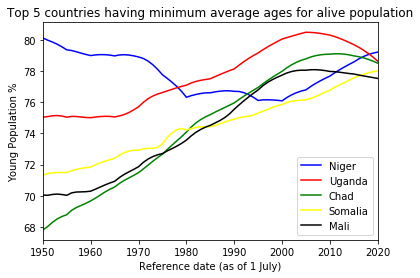

In [82]:
import matplotlib.pyplot as plt

colors = ['blue', 'red', 'green', 'yellow', 'black']
i = 0
countries = world_population_by_age_2019.nlargest(5, ['Young Population %'])[['Region, subregion, country or area *']]
for index, country in countries.iterrows():
  country = country['Region, subregion, country or area *']
  country_series = world_population_by_age_gender[world_population_by_age_gender['Region, subregion, country or area *']==str(country)][['Reference date (as of 1 July)', 'Young Population %']]
  country_series.set_index('Reference date (as of 1 July)')['Young Population %'].plot(color=colors[i], label=country)
  i += 1
plt.ylabel('Young Population %')
plt.legend()
plt.title('Top 5 countries having minimum average ages for alive population')
plt.show()

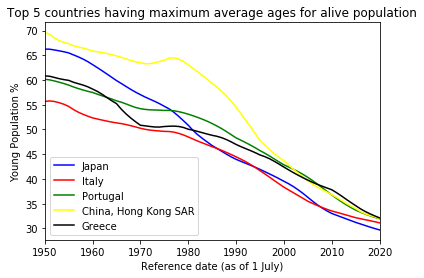

In [81]:
colors = ['blue', 'red', 'green', 'yellow', 'black']
i = 0
countries = world_population_by_age_2019.nsmallest(5, ['Young Population %'])[['Region, subregion, country or area *']]
for index, country in countries.iterrows():
  country = country['Region, subregion, country or area *']
  country_series = world_population_by_age_gender[world_population_by_age_gender['Region, subregion, country or area *']==str(country)][['Reference date (as of 1 July)', 'Young Population %']]
  country_series.set_index('Reference date (as of 1 July)')['Young Population %'].plot(color=colors[i], label=country)
  i += 1
plt.ylabel('Young Population %')
plt.legend()
plt.title('Top 5 countries having maximum average ages for alive population')
plt.show()